In [37]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
from PIL import Image, TiffImagePlugin
from PIL.ExifTags import TAGS
import re
import csv
from itertools import product
plt.rcParams['text.usetex'] = True

df = pd.read_csv('ts_paths.csv')

photodiode_arr_1 = []
photodiode_arr_2 = []

for i, row in df.iterrows():
    path = row['path']
    data = h5py.File(path)
    ts = np.array(data['LeCroy:Ch2:Trace'])
    heater = np.array(data['LeCroy:Ch1:Trace'])
    times = np.array(data['LeCroy:Time'])
    delays = np.array(data['actionlist/TS:1w2wDelay'])
    images = [np.array(data[f'13PICAM1:Pva1:Image/image {n}'], dtype=np.int32) for n in range(len(data['13PICAM1:Pva1:Image']))]

    dt = np.round(np.average(times[:,1:] - times[:,:-1]), 10)
    ts_max_idx = np.argmax(np.gradient(ts, axis=1), axis=1)
    heater_max_idx = np.argmax(np.gradient(heater, axis=1), axis=1)
    real_delays = (ts_max_idx - heater_max_idx) * dt * 1e9 - 10.1

    ts_max = np.max(ts, axis=1)
    ts_shutter = np.array((ts_max > 2), dtype=int)
    heater_max = np.max(heater, axis=1)
    heater_shutter = np.array([a != heater_max[i-1] for i, a in enumerate(heater_max)]).astype(int)

    for j, photodiode in enumerate(heater):
        if ts_shutter[j] == 1 and heater_shutter[j] == 1:
            if len(photodiode) == 2501:
                photodiode_arr_1.append(photodiode)
            else:
                photodiode_arr_2.append(photodiode)

38.983059012444805
2.4961379314035113


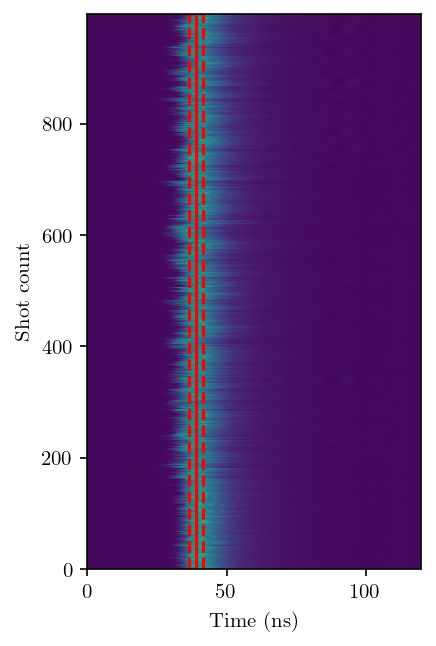

In [56]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = (r'\usepackage{amsmath} \usepackage{amssymb}')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})
# plt.rcParams['']

tmp = np.stack(photodiode_arr_1, axis=0)

tmp_max = (np.argmax(tmp, axis=1) - 500) * 0.4
a = np.average(tmp_max)
s = np.std(tmp_max)

print(a)
print(s)

tmp = tmp[:,500:800]

extent = [0, tmp.shape[1]*0.4, 0, tmp.shape[0]*0.4]

fig = plt.figure(dpi=150)
ax = fig.subplots()
# Plot with scaled axes
ax.imshow(tmp, extent=extent, aspect=0.2)
ax.set_xlabel(r'Time (ns)')
ax.set_ylabel(r'Shot count')

# Optionally adjust tick spacing for better readability
ax.set_xticks(np.arange(0, tmp.shape[1]*0.4, 50))  # Adjust step size (2) as needed
ax.set_yticks(np.arange(0, tmp.shape[0]*0.4, 200))


ax.axvline(a, c='r')
ax.axvline(a-s, c='r', linestyle='--')
ax.axvline(a+s, c='r', linestyle='--')

# plt.matshow(tmp)
plt.show()

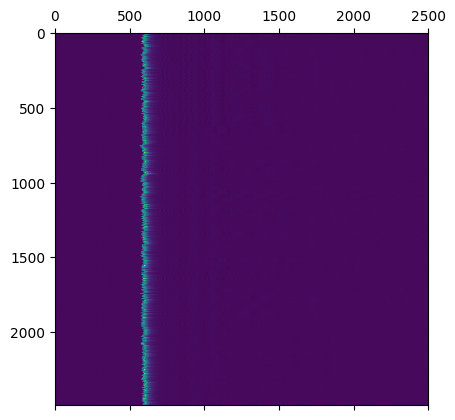

In [ ]:
tmp = np.stack(photodiode_arr_1, axis=0)
plt.matshow(tmp)
plt.show()